<a href="https://colab.research.google.com/github/elavens/Project/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from tensorflow.keras.layers import Input , Lambda , Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50 , preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


IMAGE_SIZE = [224,224]

TrainFolder = "/content/drive/MyDrive/Data (2)/Data/Train"
TestFolder = "/content/drive/MyDrive/Data (2)/Data/Test"

In [27]:
myResnet = ResNet50(input_shape= IMAGE_SIZE+[3] , weights='imagenet', include_top=False ) # include_top=False ==> remove the fully connected layer

print ( myResnet.summary() )

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [28]:
for layer in myResnet.layers:
    layer.trainable = True # we dont need to train the model . It is already trained

# classes
Classes = glob('/content/drive/MyDrive/Data (2)/Data/Train/*') #dont forget the /*
#Classes = "/content/drive/MyDrive/Data (2)/Data/Train/*"
print(Classes)


['/content/drive/MyDrive/Data (2)/Data/Train/Neem', '/content/drive/MyDrive/Data (2)/Data/Train/Ashoka', '/content/drive/MyDrive/Data (2)/Data/Train/Aloe_Vera']


In [29]:
classesNum = len(Classes)
print(classesNum)

3


In [32]:
# continue with the next layers of the model :

# add Flatten layer
PlusFlattenlayer = Flatten()(myResnet.output)

# add a Dense layer with our classes
prediction = Dense(classesNum, activation='softmax')(PlusFlattenlayer)

In [33]:
# create the model amd add tje mew layers

model = Model(inputs=myResnet.input , outputs=prediction)

print (model.summary())

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [34]:
# compile the model

model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])


# images augmentaion

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1. /255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. /255)

training_set = train_datagen.flow_from_directory(TrainFolder, target_size=(224,224),batch_size=32,class_mode='categorical')
test_set = test_datagen.flow_from_directory(TestFolder,target_size=(224,224),batch_size=32,class_mode='categorical')




Found 90 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [35]:
# fit the model
result = model.fit(training_set ,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

Epoch 1/10
3/3 [==============================] - 109s 28s/step - loss: 9.5591 - accuracy: 0.4333 - val_loss: 660.3793 - val_accuracy: 0.3333
Epoch 2/10
3/3 [==============================] - 80s 29s/step - loss: 1.3304 - accuracy: 0.9222 - val_loss: 12427.0498 - val_accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 77s 28s/step - loss: 4.0319 - accuracy: 0.8778 - val_loss: 40003.9180 - val_accuracy: 0.3333
Epoch 4/10
3/3 [==============================] - 80s 26s/step - loss: 0.4495 - accuracy: 0.9111 - val_loss: 131019.1172 - val_accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 80s 26s/step - loss: 1.3513 - accuracy: 0.8556 - val_loss: 1890651.3750 - val_accuracy: 0.3333
Epoch 6/10
3/3 [==============================] - 87s 30s/step - loss: 1.0926 - accuracy: 0.8889 - val_loss: 1346182.1250 - val_accuracy: 0.3333
Epoch 7/10
3/3 [==============================] - 89s 33s/step - loss: 5.8516 - accuracy: 0.8333 - val_loss: 869623.0625 - val_accuracy: 0

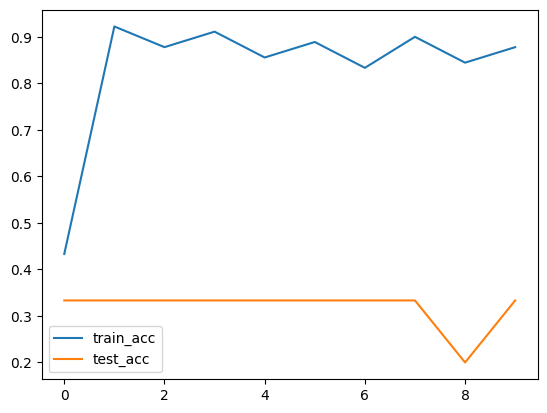

In [36]:
# plot the result

# plot the accuracy
plt.plot(result.history['accuracy'],label='train_acc')
plt.plot(result.history['val_accuracy'],label='test_acc')
plt.legend()
plt.show()

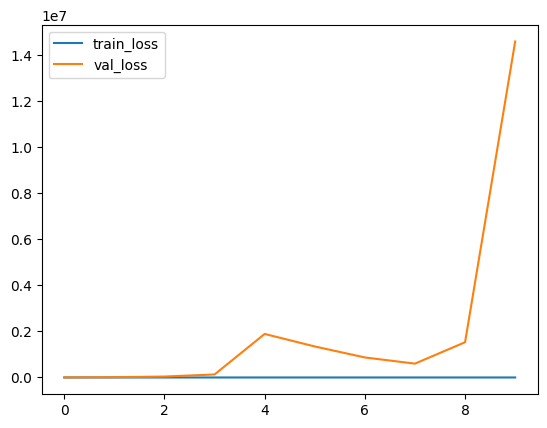

In [37]:
#plot the loss
plt.plot(result.history['loss'],label='train_loss')
plt.plot(result.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [14]:
model.save('C:/Python-cannot-upload-to-GitHub/Cars/myCarsModel.h5')